In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
def get_calib_dat(file_name,beg_pts,end_pts):
    with open('./calibrations_raw_dat/'+file_name+'.txt','r') as f_open:    # open 'file_name'
        raw_cal = f_open.read()    # read into memory as raw_cal

    raw_cal_hdr = raw_cal.split('\n')[0:10]    # first 10 rows are the header information
    raw_cal_dat = raw_cal.split('\n')[10::]    # remaining rows are calibration data points

    dat = [x.split(',') for x in raw_cal_dat]    # split data points in each row
    dat = np.array([a for b in dat for a in b])[0:-1].astype('f')    # put data points into numpy array as type float

    volt = dat[0::2]    # voltage data points
    disp = dat[1::2]    # displacement data points. should change to accomodate lbf

    if type(end_pts) != int:    # can input 'end' if no desired truncation
        end_pts = disp.size 

    z = np.polyfit(volt[beg_pts:end_pts], disp[beg_pts:end_pts], 1)    # order 1 polynomial coeffs to data. can eliminate beg/end points that are nonlinear
    cal = np.poly1d(z)    # 1d fit

    calibration,_ = np.abs(cal)    # slope coefficient, not vector, so absolute value.

    R2 = r2_score(disp[beg_pts:end_pts],cal(volt[beg_pts:end_pts]))    # r-squared value. being clever here with a one-liner.

    x_volt = np.linspace(-15, 15, 100)    # linear space voltages +/- 15 V

    #############################################################################################################

    fig, ax = plt.subplots(figsize=(5, 5),dpi=100)    # let's plot our raw data and linear fit

    ax.scatter(volt, disp, color='gray')    # plot all calibration data
    ax.scatter(volt[beg_pts:end_pts], disp[beg_pts:end_pts], color='r')    # plot used points used in linear fit
    ax.plot(x_volt, cal(x_volt), 'b-', label='calibration = '+str(calibration)+'\n$R^2$ = '+str(np.round(R2,5)))    # plot linear fit. label with calibration coeff & R2 -- rounded.

    plt.xlabel('Volt'), plt.ylabel('displacement (mm)')    # x & y labels
    plt.xlim([min(volt)+0.05*min(volt),max(volt)+0.05*max(volt)])    # x-limits. 5% "wiggle room"
    plt.title(file_name)    # title with filename

    plt.legend()    # display legend
    plt.show()    # show plot

    return calibration, R2    # return slope (calibration value) and R-squared value. 

In [3]:
filenames = np.array(['tt244_lr_hg_27Jan2021','tt244_lr_lg_27Jan2021',
'tt244_sr_hg_27Jan2021','tt244_sr_lg_27Jan2021',
'tt245_hg_cal_07Feb2021','tt245_lg_cal_07Feb2021','tt245_lg2_cal_07Feb2021'])

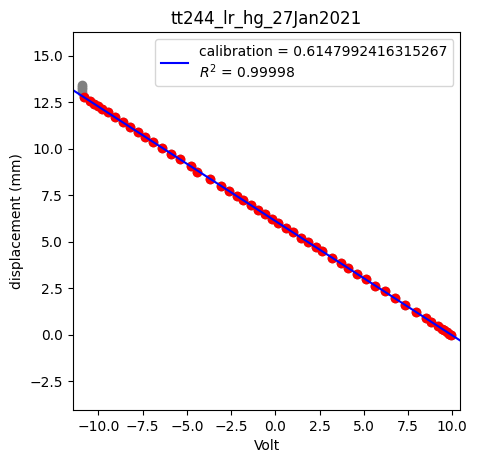

(0.6147992416315267, 0.9999839073621841)

In [4]:
get_calib_dat(filenames[0],0,-4)

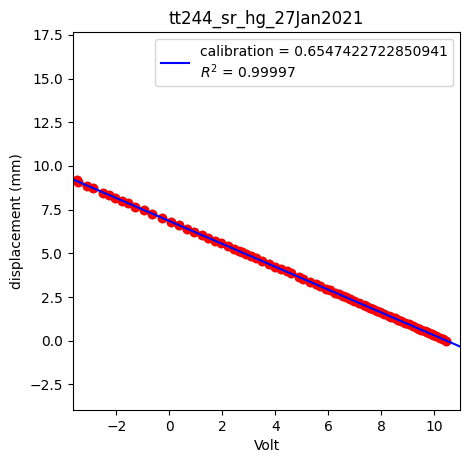

(0.6547422722850941, 0.9999716638943322)

In [5]:
get_calib_dat(filenames[2],0,'end')

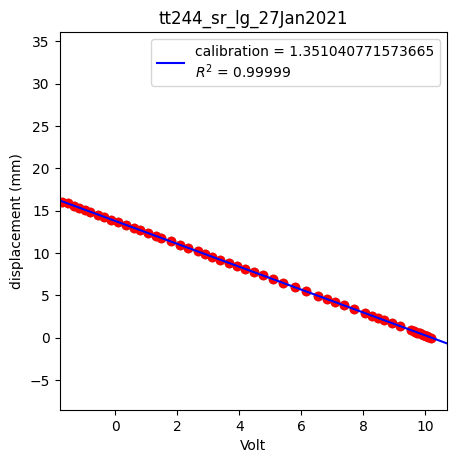

(1.351040771573665, 0.9999884787059163)

In [6]:
get_calib_dat(filenames[3],0,'end')

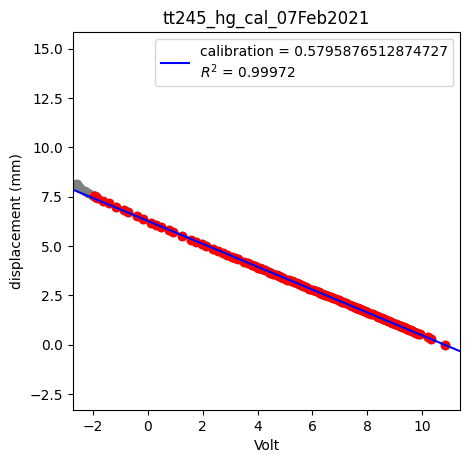

(0.5795876512874727, 0.9997179353811392)

In [7]:
get_calib_dat(filenames[4],0,-8)

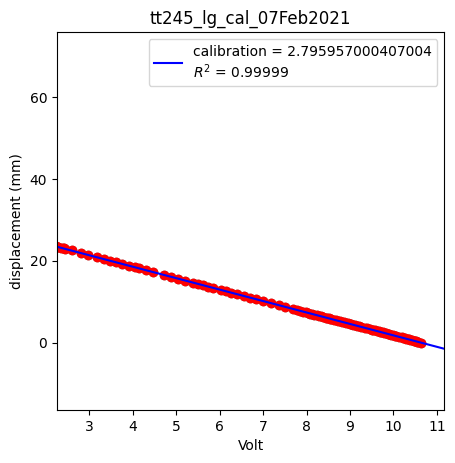

(2.795957000407004, 0.9999914667027857)

In [8]:
get_calib_dat(filenames[5],0,-2)